# Benchmarks for Circuit Unoptimization in ZNE

In [2]:
from unopt.benchmark import bench
from unopt.circuit import generate_random_two_qubit_gate_circuit
from unopt.plots import plot_circuit_depths_from_results

Initial circuit:
            ┌───┐           ┌───┐           
q_0: ─X────┤ X ├─────────■─┤ X ├─X──■──────
      │    └─┬─┘         │ └─┬─┘ │  │      
q_1: ─┼──X───■────■───X──■───┼───X──┼───■──
      │  │        │   │      │      │   │  
q_2: ─X──┼────────┼───┼──────┼──────■───┼──
         │      ┌─┴─┐ │      │        ┌─┴─┐
q_3: ────X──────┤ X ├─X──────■────────┤ X ├
                └───┘                 └───┘
Ideal value: 1.0

Unmitigated expectation value: 0.8542000000000001
Unmitigated estimation error: 0.14579999999999993

Noise-scaled expectation values from fold_global: 
 [0.8602, 0.636, 0.4714]
Folded circuit depths: [8, 24, 40]
The RichardsonFactory zero-noise extrapolation is: 0.9946499999999999
ZNE expectation value: 0.9946499999999999
ZNE estimation error: 0.005350000000000077

Noise-scaled expectation values from circuit unoptimization: 
 [0.8555999999999999, 0.35919999999999996, 0.17240000000000003]
Unoptimized circuit depths: [8, 93, 157]
The RichardsonFactory zero-noise 

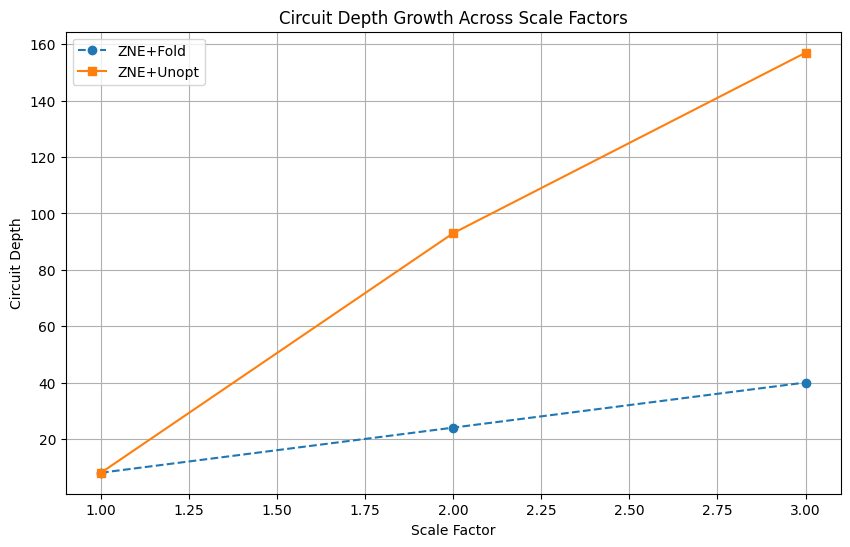

In [3]:
qc = generate_random_two_qubit_gate_circuit(num_qubits=4, depth=5)

results = bench(qc, scale_factors_zne=[1, 3, 5], scale_factors_unopt=[0, 2, 4], verbose=True)

plot_circuit_depths_from_results(results)